In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn import datasets
from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import export_graphviz
from sklearn import tree

In [3]:
df = pd.read_csv("dataFrameFinal.csv")

In [4]:
all_target = ["rarity_COMMON", "rarity_EPIC","rarity_FREE","rarity_LEGENDARY", "rarity_RARE"]
t0=df.rarity_FREE.values
t1=df.rarity_COMMON.values
t2=df.rarity_RARE.values
t3=df.rarity_EPIC.values
t4=df.rarity_LEGENDARY.values
variable = [col for col in df.columns  if col not in  all_target]
X=df[variable]

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, t4, test_size=0.3, stratify=t4)

In [8]:
n_estimators = 2500
forest = RandomForestClassifier(n_estimators, max_features= 3, max_depth = 65,random_state=42)
forest.fit(X_train, y_train)

predictions = forest.predict(X_test)
accuracy = accuracy_score(y_test, predictions)
precision = precision_score(y_test, predictions)
recall = recall_score(y_test, predictions)
f1 = f1_score(y_test, predictions)
print(f" ========= target : rarity_LEGENDARY")
print(f"accuracy : {accuracy}")
print("====================")
print(f"precision : {precision}")
print("====================")
print(f"recall : {recall}")
print("====================")
print(f"f1-score : {f1}")

 ========= target : rarity_LEGENDARY
accuracy : 0.8762827822120867
precision : 0.9545454545454546
recall : 0.16342412451361868
f1-score : 0.27906976744186046


In [29]:
X_train, X_test, y_train, y_test = train_test_split(X, t0, test_size=0.3, stratify=t0)

n_estimators = 2500
forest = RandomForestClassifier(n_estimators, max_features= 3, max_depth = 65,random_state=42)
forest.fit(X_train, y_train)

predictions = forest.predict(X_test)
accuracy = accuracy_score(y_test, predictions)
precision = precision_score(y_test, predictions)
recall = recall_score(y_test, predictions)
f1 = f1_score(y_test, predictions)
print(f" ========= target : rarity_FREE")
print(f"accuracy : {accuracy}")
print("====================")
print(f"precision : {precision}")
print("====================")
print(f"recall : {recall}")
print("====================")
print(f"f1-score : {f1}")

 ========= target : rarity_FREE
accuracy : 0.9532497149372862
precision : 0.9649122807017544
recall : 0.5851063829787234
f1-score : 0.7284768211920529


In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, t1, test_size=0.3, stratify=t1)

n_estimators = 2500
forest = RandomForestClassifier(n_estimators, max_features= 1, max_depth = 65,random_state=42)
forest.fit(X_train, y_train)

predictions = forest.predict(X_test)
accuracy = accuracy_score(y_test, predictions)
precision = precision_score(y_test, predictions)
recall = recall_score(y_test, predictions)
f1 = f1_score(y_test, predictions)
print(f" ========= target : rarity_COMMON")
print(f"accuracy : {accuracy}")
print("====================")
print(f"precision : {precision}")
print("====================")
print(f"recall : {recall}")
print("====================")
print(f"f1-score : {f1}")



 ========= target : rarity_COMMON
accuracy : 0.6761687571265679
precision : 0.8596491228070176
recall : 0.08045977011494253
f1-score : 0.14714714714714713


In [30]:
X_train, X_test, y_train, y_test = train_test_split(X, t2, test_size=0.3, stratify=t2)

n_estimators = 2500
forest = RandomForestClassifier(n_estimators, max_features= 10, max_depth = 70,random_state=42)
forest.fit(X_train, y_train)

predictions = forest.predict(X_test)
accuracy = accuracy_score(y_test, predictions)
precision = precision_score(y_test, predictions)
recall = recall_score(y_test, predictions)
f1 = f1_score(y_test, predictions)
print(f" ========= target : rarity_RARE")
print(f"accuracy : {accuracy}")
print("====================")
print(f"precision : {precision}")
print("====================")
print(f"recall : {recall}")
print("====================")
print(f"f1-score : {f1}")

 ========= target : rarity_RARE
accuracy : 0.7588369441277081
precision : 0.5846153846153846
recall : 0.08755760368663594
f1-score : 0.1523046092184369


In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, t3, test_size=0.3, stratify=t3)

n_estimators = 2500
forest = RandomForestClassifier(n_estimators, max_features=  12, max_depth = 100,random_state=42)
forest.fit(X_train, y_train)

predictions = forest.predict(X_test)
accuracy = accuracy_score(y_test, predictions)
precision = precision_score(y_test, predictions)
recall = recall_score(y_test, predictions)
f1 = f1_score(y_test, predictions)
print(f" ========= target : rarity_EPIC")
print(f"accuracy : {accuracy}")
print("====================")
print(f"precision : {precision}")
print("====================")
print(f"recall : {recall}")
print("====================")
print(f"f1-score : {f1}")

 ========= target : rarity_EPIC
accuracy : 0.8534777651083238
precision : 0.7142857142857143
recall : 0.05639097744360902
f1-score : 0.10452961672473868


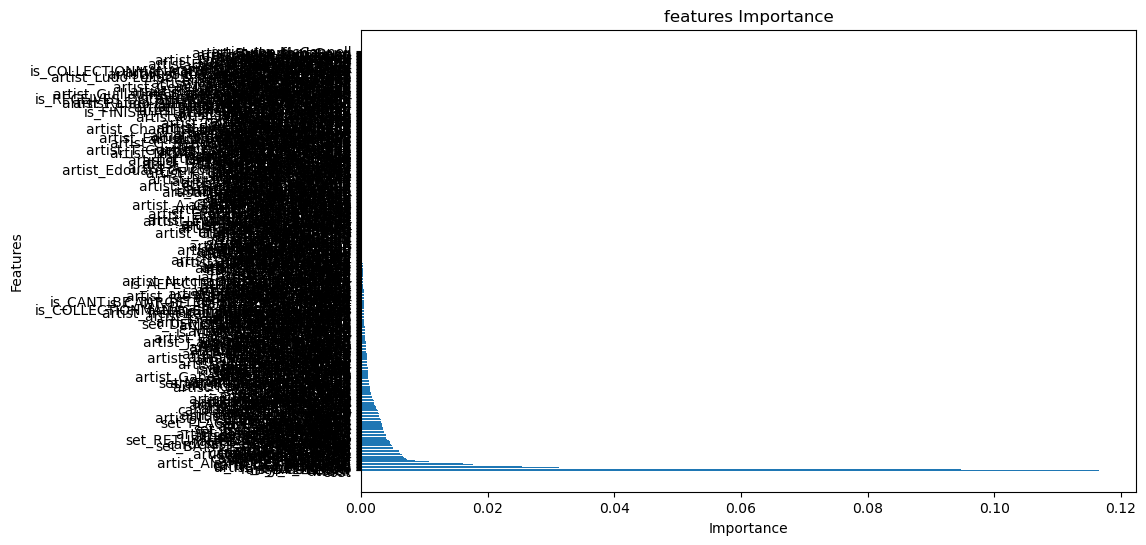

In [77]:
import matplotlib.pyplot as plt

importances = forest.feature_importances_
indices = (-importances).argsort()
sorted_features = [X.columns[i] for i in indices]
sorted_importances = importances[indices]

plt.figure(figsize=(10, 6))
plt.barh(range(len(X.columns)), sorted_importances, align='center')
plt.yticks(range(len(X.columns)), sorted_features)
plt.xlabel('Importance')
plt.ylabel('Features')
plt.title('features Importance')
plt.show()


In [9]:
importance=forest.feature_importances_
df_importance=pd.Series(importance, index=df[variable].columns)
df_importance
feature_importantes=df_importance[df_importance > 0.0075]
feature_importantes

cost                             0.130432
attack                           0.095456
health                           0.089784
is_BATTLECRY                     0.032517
is_DEATHRATTLE                   0.013821
is_TRIGGER_VISUAL                0.015765
is_TAUNT                         0.009992
is_QUEST                         0.013902
artist_Alex Horley Orlandelli    0.020137
artist_James Ryman               0.024217
cardClass_NEUTRAL                0.016607
type_MINION                      0.023539
type_SPELL                       0.018895
dtype: float64

In [73]:
feature_importantes.index

Index(['cost', 'attack', 'health', 'is_BATTLECRY', 'is_DEATHRATTLE',
       'is_TRIGGER_VISUAL', 'is_TAUNT', 'is_DISCOVER', 'artist_Matt Dixon',
       'artist_Zoltan Boros', 'cardClass_DRUID', 'cardClass_HUNTER',
       'cardClass_MAGE', 'cardClass_NEUTRAL', 'cardClass_PALADIN',
       'cardClass_PRIEST', 'cardClass_ROGUE', 'cardClass_SHAMAN',
       'cardClass_WARLOCK', 'cardClass_WARRIOR', 'type_MINION', 'type_SPELL'],
      dtype='object')

In [74]:
df.shape

(5845, 556)

In [10]:
df_trier=df[feature_importantes.index].copy()

In [11]:
df_trier.shape

(5845, 13)

In [13]:
variable_trier = [col for col in df.columns  if col not in  all_target]
X_trier=df[variable_trier]

In [14]:
X_train_trier, X_test_trier, y_train_trier, y_test_trier = train_test_split(X_trier, t4, test_size=0.3, stratify=t4)

In [15]:
n_estimators = 2500
forest = RandomForestClassifier(n_estimators, max_features= 1, max_depth = 150,random_state=42)
forest.fit(X_train, y_train)

predictions = forest.predict(X_test)
accuracy = accuracy_score(y_test, predictions)
precision = precision_score(y_test, predictions)
recall = recall_score(y_test, predictions)
f1 = f1_score(y_test, predictions)
print(f" ========= target : rarity_LEGENDARY")
print(f"accuracy : {accuracy}")
print("====================")
print(f"precision : {precision}")
print("====================")
print(f"recall : {recall}")
print("====================")
print(f"f1-score : {f1}")

 ========= target : rarity_LEGENDARY
accuracy : 0.8825541619156214
precision : 0.9047619047619048
recall : 0.22178988326848248
f1-score : 0.35625
